# Forschungsdaten des Bayerischen Archivs für Sprachsignale (BAS)

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

3. [Word Clouds](#3)


<a id="1"></a>
## 1. Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [1]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:

# Erstellen des 1. Dataframes (zeilenweise)
data_bas = pd.read_csv(r'../../data/refined/clarin/bas/bas-records-20240620_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten


# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_bas_grouped = data_bas.copy()
data_bas_grouped['record id'] = data_bas_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record id
data_bas_grouped = data_bas_grouped.groupby('record id').agg({
    'datestamp': 'first',  
    'language': lambda x: '; '.join(x.dropna().unique()),  
    'publisher': lambda x: '; '.join(x.dropna().unique()),  
    'identifier': lambda x: '; '.join(x.dropna().unique()),  
    'creator': lambda x: '; '.join(x.dropna().unique()),  
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'title': lambda x: '; '.join(x.dropna().unique()),  
    'description': lambda x: '; '.join(x.dropna().unique()),  
    'format': lambda x: '; '.join(x.dropna().unique()),  
    'format - mediatype': lambda x: '; '.join(x.dropna().unique()),  
    'format - subtype': lambda x: '; '.join(x.dropna().unique()),  
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),  
    'subject': lambda x: '; '.join(x.dropna().unique()),  
    'record id': 'first',  
}).reset_index(drop=True)

data_bas_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen

data_bas_grouped[['date', 'datestamp']] = data_bas_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_bas[['date', 'datestamp']] = data_bas[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_bas_grouped.replace('','NA', inplace=True)  # Fehlende Werte mit NA ersetzen




                        column  count   type
4                      creator  28100  valid
5                         date  28100  valid
0                    datestamp  28101  valid
7                  description  24887  valid
8                       format  24886  valid
9           format - mediatype  24886  valid
10            format - subtype      1  valid
3                   identifier  28097  valid
1                     language  28096  valid
2                    publisher  28101  valid
14                   record id  28101  valid
13                     subject     58  valid
6                        title  28098  valid
11                        type  24886  valid
12  type - dcmi recommendation  24886  valid


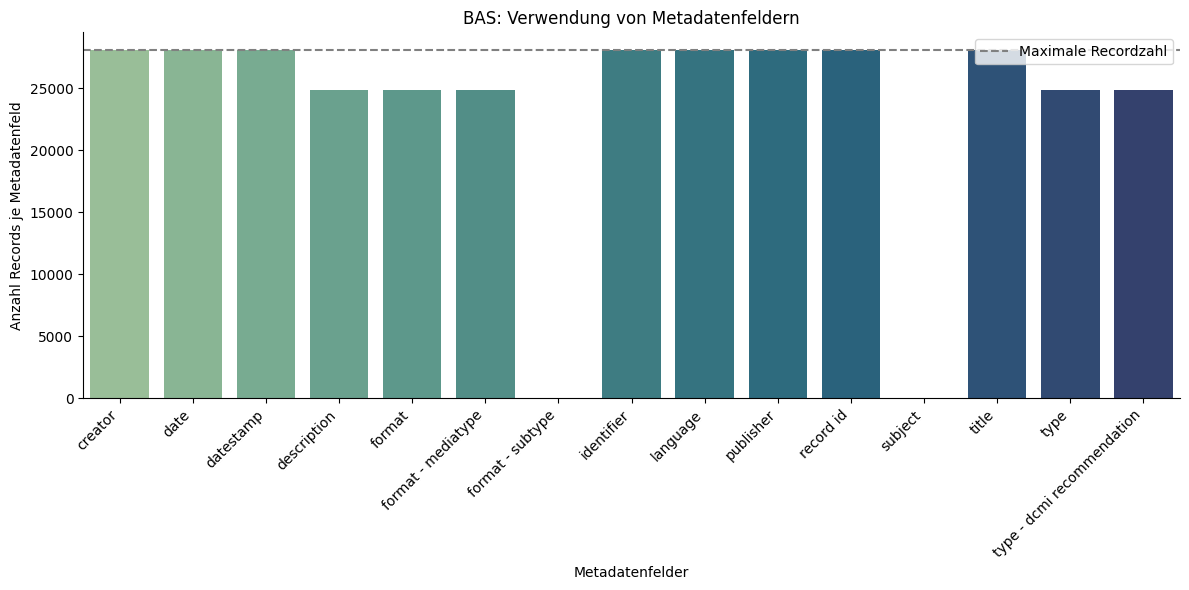

In [3]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_bas_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_bas_grouped[column][data_bas_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_bas_grouped['record id'].nunique()


sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='crest')


# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('BAS: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("BAS_Verwendung_von_Metadatenfeldern.png", dpi=600)

plt.show()




In [4]:
'Zeilenweiser Dataframe: Info zu Spalten und Datentypen'

data_bas.info() # Spaltennamen, Datentypen und fehlende Werte anzeigen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28450 entries, 0 to 28449
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   28101 non-null  datetime64[ns, UTC]
 1   language                    28387 non-null  object             
 2   publisher                   28163 non-null  object             
 3   identifier                  28155 non-null  object             
 4   creator                     28150 non-null  object             
 5   date                        28100 non-null  datetime64[ns, UTC]
 6   title                       28098 non-null  object             
 7   description                 24888 non-null  object             
 8   format                      24887 non-null  object             
 9   format - mediatype          24887 non-null  object             
 10  format - subtype            1 non-null      object        

In [5]:
'Zeilenweiser Dataframe: Erste 5 Zeilen'

data_bas.head() 

,datestamp,language,publisher,identifier,creator,date,title,description,format,format - mediatype,format - subtype,type,type - dcmi recommendation,subject,record id,record - header - setSpec
0,2019-09-16 16:03:53+00:00,NaN,WebLicht Webservice Orchestrator,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oai:BAS.repo:Weblicht/webmaus-weblicht,Weblicht
1,2022-07-26 18:10:13+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0007-F7DA-D,COALA,2021-05-18 00:00:00+00:00,w426_px,wizard-of-oz session,multipart,multipart,NaN,collection,collection,NaN,oai:BAS.repo:Corpora/SK-Public/w426_px,Corpora:SK-Public
2,2022-07-26 18:10:10+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0007-F7C4-5,COALA,2021-05-18 00:00:00+00:00,w403_pa,wizard-of-oz session,multipart,multipart,NaN,collection,collection,NaN,oai:BAS.repo:Corpora/SK-Public/w403_pa,Corpora:SK-Public
3,2022-07-26 18:10:04+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0007-F78E-3,COALA,2021-05-18 00:00:00+00:00,w069_pk,wizard-of-oz session,multipart,multipart,NaN,collection,collection,NaN,oai:BAS.repo:Corpora/SK-Public/w069_pk,Corpora:SK-Public
4,2022-07-26 18:09:58+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0007-F758-0,COALA,2021-05-18 00:00:00+00:00,w013_pk,wizard-of-oz session,multipart,multipart,NaN,collection,collection,NaN,oai:BAS.repo:Corpora/SK-Public/w013_pk,Corpora:SK-Public


In [6]:
'Zeilenweiser Dataframe: Statistische Kennzahlen'

data_bas.describe() 

,datestamp,language,publisher,identifier,creator,date,title,description,format,format - mediatype,format - subtype,type,type - dcmi recommendation,subject,record id,record - header - setSpec
count,28101,28387,28163,28155,28150,28100,28098,24888,24887,24887,1,24887,24887,58,28101,28101
unique,NaN,21,20,28155,23,NaN,18040,4307,2,2,1,2,2,58,28101,63
top,NaN,deu,BAS,http://hdl.handle.net/11022/1009-0000-0007-F7DA-D,COALA,NaN,2079,recording of a telephone call (1 speaker) of t...,multipart,multipart,wadl+xml,collection,collection,SmartKom Public,oai:BAS.repo:Weblicht/webmaus-weblicht,Corpora:FORMTASK
freq,NaN,25560,27887,1,20947,NaN,6,4366,24886,24886,1,24886,24886,1,1,4367
mean,2019-12-08 03:00:28.691505664+00:00,NaN,NaN,NaN,NaN,2016-08-09 19:26:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017-05-16 16:41:09+00:00,NaN,NaN,NaN,NaN,2013-01-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017-05-16 16:59:41+00:00,NaN,NaN,NaN,NaN,2016-05-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020-01-07 16:23:37+00:00,NaN,NaN,NaN,NaN,2017-03-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-02-08 16:14:12+00:00,NaN,NaN,NaN,NaN,2017-05-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-05-25 14:19:14+00:00,NaN,NaN,NaN,NaN,2023-02-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
'Recordweiser Dataframe: Info zu Spalten und Datentypen'

data_bas_grouped.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28101 entries, 0 to 28100
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   28101 non-null  datetime64[ns, UTC]
 1   language                    28101 non-null  object             
 2   publisher                   28101 non-null  object             
 3   identifier                  28101 non-null  object             
 4   creator                     28101 non-null  object             
 5   date                        28100 non-null  datetime64[ns, UTC]
 6   title                       28101 non-null  object             
 7   description                 28101 non-null  object             
 8   format                      28101 non-null  object             
 9   format - mediatype          28101 non-null  object             
 10  format - subtype            28101 non-null  object        

In [8]:
'recordweiser Dataframe: Erste 5 Zeilen'

data_bas_grouped.head(200) 

,datestamp,language,publisher,identifier,creator,date,title,description,format,format - mediatype,format - subtype,type,type - dcmi recommendation,subject,record id
0,2023-07-03 07:59:57+00:00,NA,BAS,http://hdl.handle.net/11022/1009-0000-0001-231F-6,Florian Schiel,2022-03-22 00:00:00+00:00,"Bavarian Archive for Speech Signals, Ludwig-Ma...",CLARIN center with main focus on German multi-...,NA,NA,NA,NA,NA,NA,oai:BAS.repo:Center/BAS
1,2017-05-16 16:41:09+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-88E...,COALA; Florian Schiel,2016-11-23 00:00:00+00:00,BAS Alcohol Language Corpus,This corpus contains recordings of 162 speaker...,multipart,multipart,NA,collection,collection,BAS Alcohol Language Corpus,oai:BAS.repo:Corpora/ALC/ALC
2,2017-05-16 16:41:10+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-878D-8,COALA,2016-11-26 00:00:00+00:00,ses1006,recording session ses1006 of corpus BAS ALC wi...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Corpora/ALC/ses1006
3,2017-05-16 16:41:10+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-878E-7,COALA,2016-11-26 00:00:00+00:00,ses1007,recording session ses1007 of corpus BAS ALC wi...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Corpora/ALC/ses1007
4,2017-05-16 16:41:10+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-878F-6,COALA,2016-11-26 00:00:00+00:00,ses1008,recording session ses1008 of corpus BAS ALC wi...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Corpora/ALC/ses1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2017-05-16 16:41:41+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-884E-F,COALA,2016-11-26 00:00:00+00:00,ses3031,recording session ses3031 of corpus BAS ALC wi...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Corpora/ALC/ses3031
196,2017-05-16 16:41:41+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-884F-E,COALA,2016-11-26 00:00:00+00:00,ses3032,recording session ses3032 of corpus BAS ALC wi...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Corpora/ALC/ses3032
197,2017-05-16 16:41:41+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-8850-B,COALA,2016-11-26 00:00:00+00:00,ses3033,recording session ses3033 of corpus BAS ALC wi...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Corpora/ALC/ses3033
198,2017-05-16 16:41:41+00:00,deu,BAS,http://hdl.handle.net/11022/1009-0000-0001-8851-A,COALA,2016-11-26 00:00:00+00:00,ses3034,recording session ses3034 of corpus BAS ALC wi...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Corpora/ALC/ses3034


In [9]:
'Recordweiser Dataframe: Statistische Kennzahlen'
data_bas_grouped.describe()

,datestamp,language,publisher,identifier,creator,date,title,description,format,format - mediatype,format - subtype,type,type - dcmi recommendation,subject,record id
count,28101,28101,28101,28101,28101,28100,28101,28101,28101,28101,28101,28101,28101,28101,28101
unique,NaN,30,17,28098,23,NaN,18041,4307,3,3,2,3,3,59,28101
top,NaN,deu,BAS,NA,COALA,NaN,2094,recording of a telephone call (1 speaker) of t...,multipart,multipart,NA,collection,collection,NA,oai:BAS.repo:Center/BAS
freq,NaN,25273,27830,4,20906,NaN,6,4366,24885,24885,28100,24885,24885,28043,1
mean,2019-12-08 03:00:28.691505664+00:00,NaN,NaN,NaN,NaN,2016-08-09 19:26:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017-05-16 16:41:09+00:00,NaN,NaN,NaN,NaN,2013-01-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017-05-16 16:59:41+00:00,NaN,NaN,NaN,NaN,2016-05-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020-01-07 16:23:37+00:00,NaN,NaN,NaN,NaN,2017-03-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-02-08 16:14:12+00:00,NaN,NaN,NaN,NaN,2017-05-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-05-25 14:19:14+00:00,NaN,NaN,NaN,NaN,2023-02-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
'Verwendete Farbpalette'

sns.color_palette('crest', 12)

[(0.56402533, 0.76325185, 0.56935664),
 (0.4764113, 0.72239788, 0.56708475),
 (0.39672238, 0.6796942, 0.56585103),
 (0.33334501, 0.63685626, 0.56467661),
 (0.27726216, 0.59051189, 0.56137785),
 (0.22651648, 0.54398082, 0.5562029),
 (0.178092, 0.50006616, 0.55096224),
 (0.1325044, 0.45318928, 0.54533736),
 (0.11089152, 0.40423445, 0.53719455),
 (0.11984752, 0.35531657, 0.52400649),
 (0.14222093, 0.30173071, 0.50252813),
 (0.16290577, 0.24649998, 0.47217025)]

In [11]:
crest_palette = sns.color_palette('crest', 12, as_cmap=False)
crest_hex = crest_palette.as_hex()
print(crest_hex)

['#90c391', '#79b891', '#65ad90', '#55a290', '#47978f', '#3a8b8e', '#2d808c', '#22748b', '#1c6789', '#1f5b86', '#244d80', '#2a3f78']


<a id="2"></a>
## 2. Univariate Plots

[Zurück zum Anfang](#0)



### Publikation von Forschungsdaten im Zeitverlauf
[Zurück zum Anfang](#0)

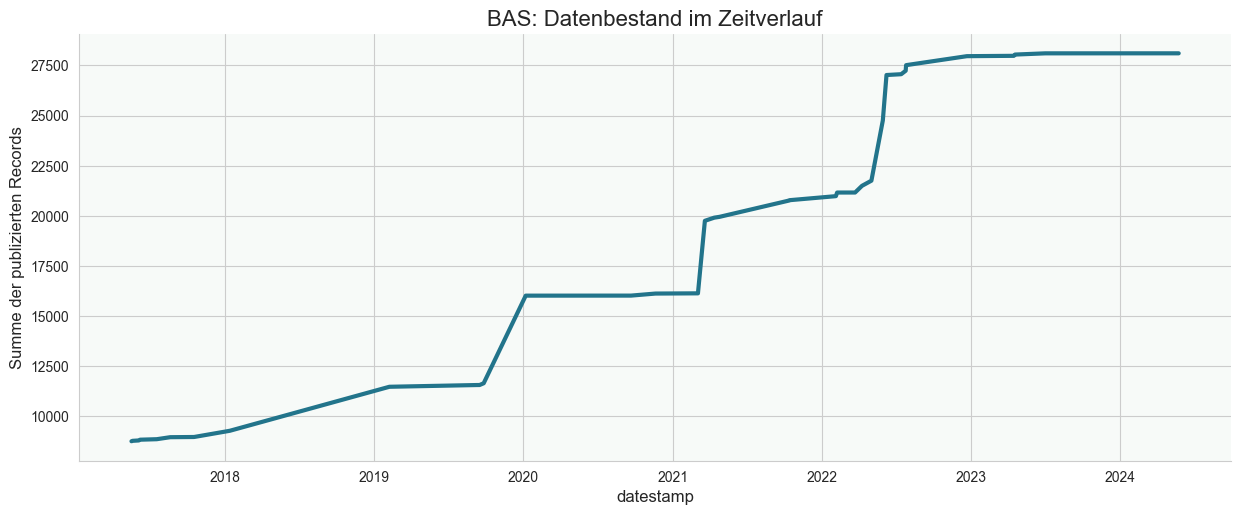

frühster Datestamp: 2017-05-16 ; spätester Datestamp: 2024-05-25


In [12]:
'Verwendung von datestamp'

daily_counts = data_bas.groupby(data_bas['datestamp'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#f7faf8', 'figure.facecolor': 'white' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='datestamp', y='cumulative_count', kind='line', aspect=2.5, errorbar = None, color='#22748b', linewidth=3)


plt.title('BAS: Datenbestand im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Summe der publizierten Records', fontsize=12)
plt.savefig("BAS_datestamp_line_cum.png", dpi=600, bbox_inches='tight')
# plt.xticks(rotation=45) 
plt.show()

print('frühster Datestamp:', data_bas['datestamp'].min().date(), '; spätester Datestamp:', data_bas['datestamp'].max().date())

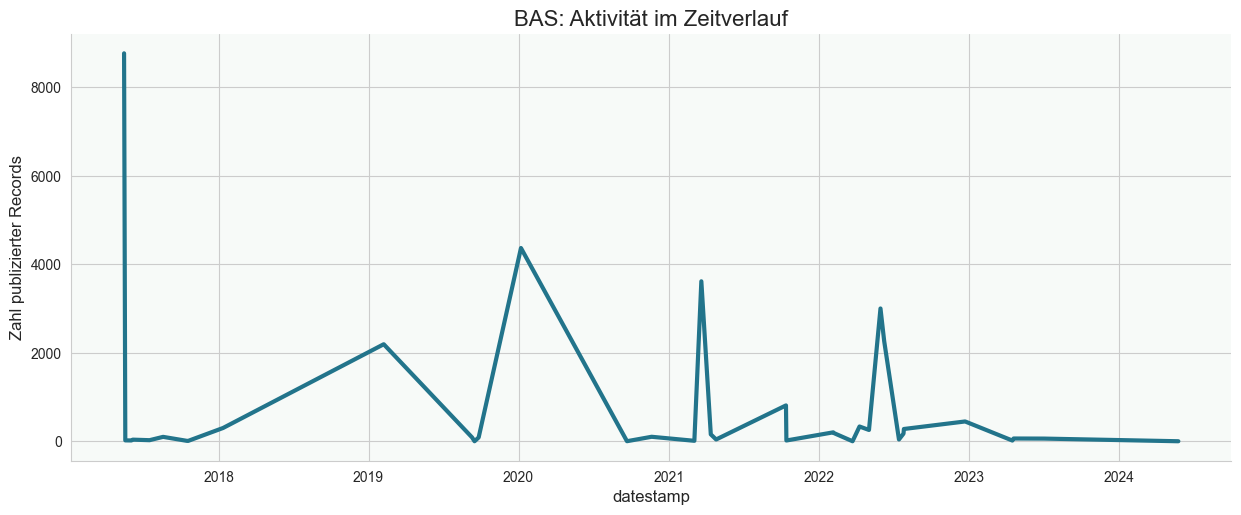

frühster Datestamp: 2017-05-16 ; spätester Datestamp: 2024-05-25


In [13]:

# verwendet daily_counts = gruppierte Records nach datestamp

sns.set_style('whitegrid', {'axes.facecolor':'#f7faf8', 'figure.facecolor': 'white' }) # Style des Plots anpassen

sns.relplot(data=daily_counts, x='datestamp', y='count', kind='line', color='#22748b', aspect=2.5, linewidth=3) 

plt.title('BAS: Aktivität im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Zahl publizierter Records', fontsize=12)
plt.savefig("BAS_datestamp_line.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühster Datestamp:', data_bas['datestamp'].min().date(), '; spätester Datestamp:', data_bas['datestamp'].max().date())

### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

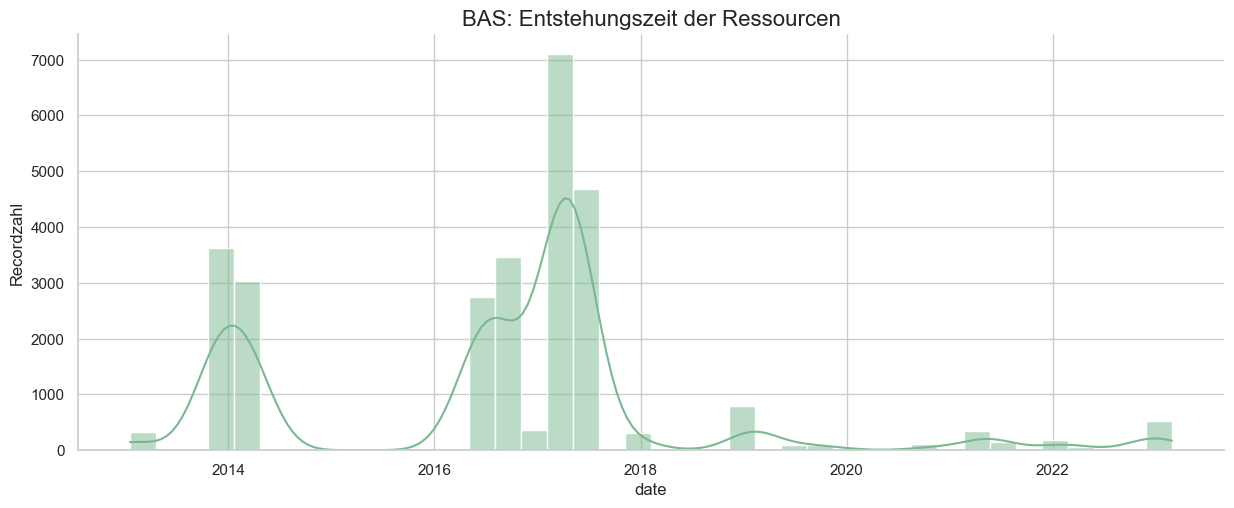

frühstes Datum: 2013-01-17 ; spätestes Datum: 2023-02-27


In [14]:
sns.set_theme(style='whitegrid') # seaborn-Design setzen
sns.displot(data_bas_grouped, x='date', bins=40, kde=-True, color = '#79b891', aspect=2.5) # Erscheinungszeitpunkt der Forschungsdaten in absolten Zahlen

plt.title('BAS: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("BAS_date_hist.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühstes Datum:', data_bas['date'].min().date(), '; spätestes Datum:', data_bas['date'].max().date())


### Verteilung der Urheberschaft

[Zurück zum Anfang](#0)

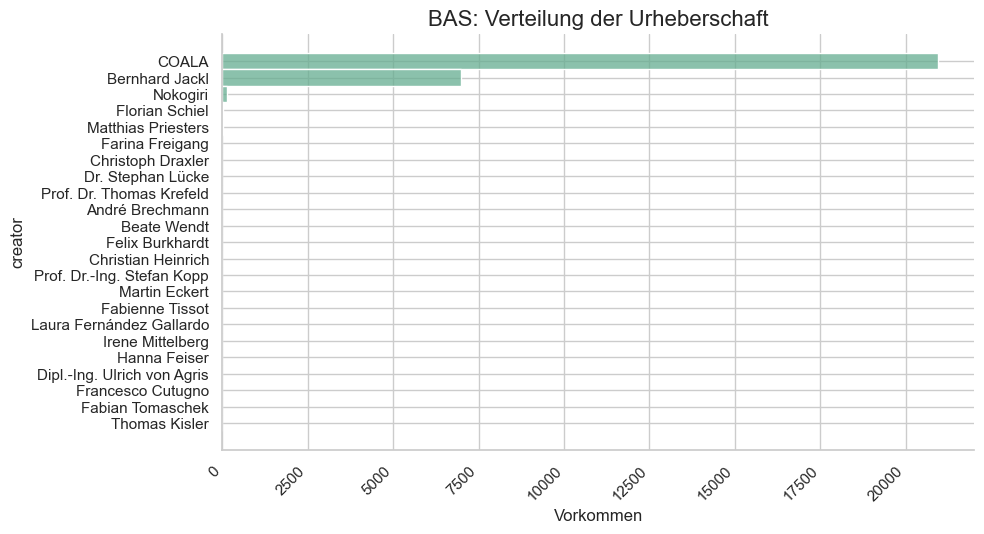

In [15]:
sns.set_theme() #Wiederherstellen der Defaulteinstellungen

# Ordnen der Werte nach Häufigkeit
order = data_bas['creator'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_bas['creator'] = pd.Categorical(data_bas['creator'], categories=order, ordered=True)

sns.set_style('whitegrid')
sns.displot(data_bas, y = 'creator', color='#65ad90', aspect = 2)

plt.xticks(rotation=90)
plt.title('BAS: Verteilung der Urheberschaft', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('creator', fontsize=12)
plt.savefig('BAS_Verteilung_creator_hist.png', dpi=600, bbox_inches='tight')
plt.show()

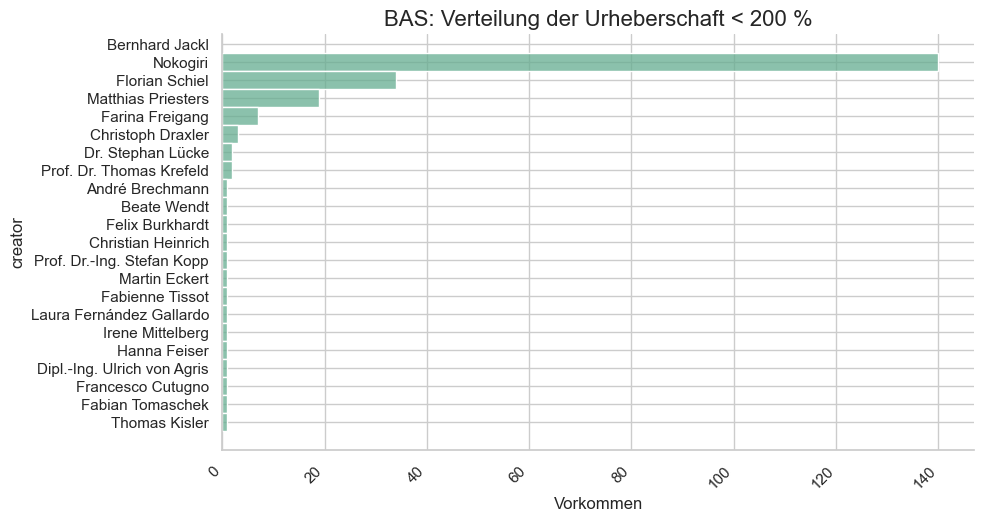

In [16]:

order = data_bas['creator'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_bas['creator'] = pd.Categorical(data_bas['creator'], categories=order, ordered=True)
data_bas_creator_flt = data_bas[(data_bas['creator'] != 'COALA') & (data_bas['creator'] != 'Bernhard Jackl')]


sns.set_style('whitegrid')
sns.displot(data_bas_creator_flt, y = 'creator', color='#65ad90', aspect = 2)
plt.xticks(rotation=90)
plt.title('BAS: Verteilung der Urheberschaft < 200 %', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('creator', fontsize=12)
plt.savefig('BAS_Verteilung_creator_hist_detail.png', dpi=600, bbox_inches='tight')
plt.show()

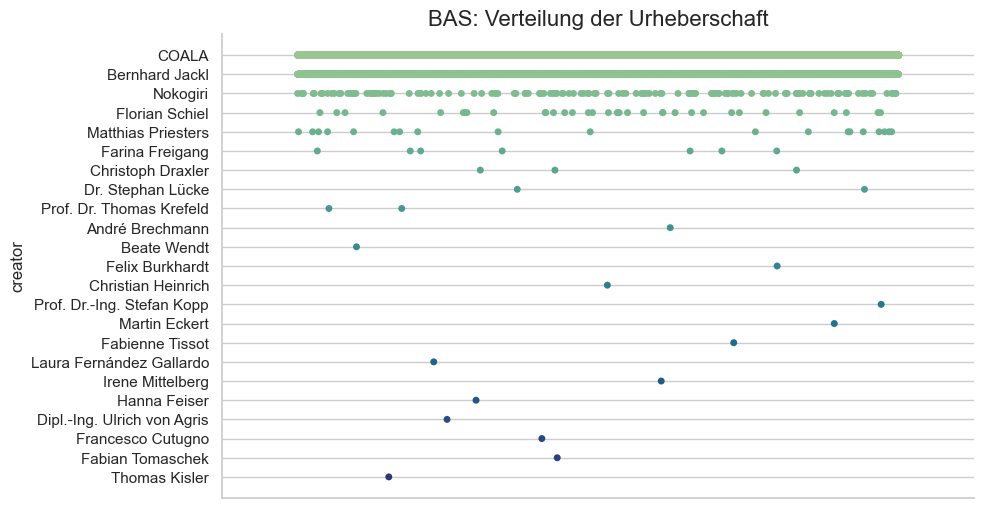

In [17]:
'Scatterplot: Verteilung der Urheberschaft'

# Reihenfolge der Werte festlegen
order = data_bas['creator'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_bas['creator'] = pd.Categorical(data_bas['creator'], categories=order, ordered=True)


sns.catplot(data_bas, y = 'creator', aspect = 2, hue = 'creator', palette="crest", jitter=0.4, legend=False) # Verteilung mit erhöhtem Jitter

plt.title('BAS: Verteilung der Urheberschaft', fontsize=16)
plt.ylabel('creator', fontsize=12)
plt.savefig('BAS_Verteilung_creator_scatter.png', dpi=600, bbox_inches='tight')
plt.show()


### Sprachverteilung der Forschungsdaten

[Zurück zum Anfang](#0)

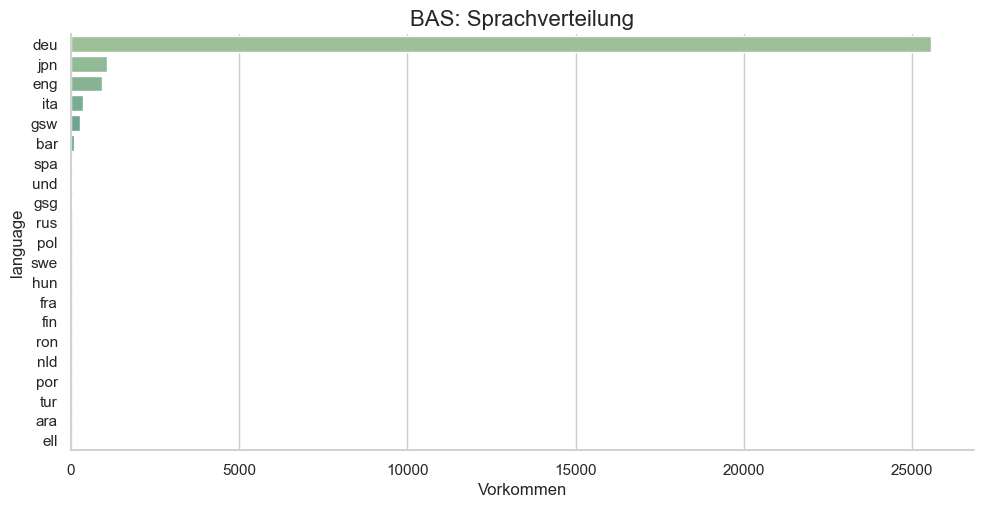

In [18]:
# Reihenfolge der Sprachen festlegen
order = data_bas['language'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_bas['language'] = pd.Categorical(data_bas['language'], categories=order, ordered=True)
sns.set_style('whitegrid')
sns.catplot(data_bas, y = 'language', kind = 'count', aspect = 2, hue = 'language', palette = 'crest', legend=False)

plt.title('BAS: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.xlabel('Vorkommen', fontsize=12)
plt.savefig('BAS_language_cat.png', dpi=600, bbox_inches='tight')
plt.show()

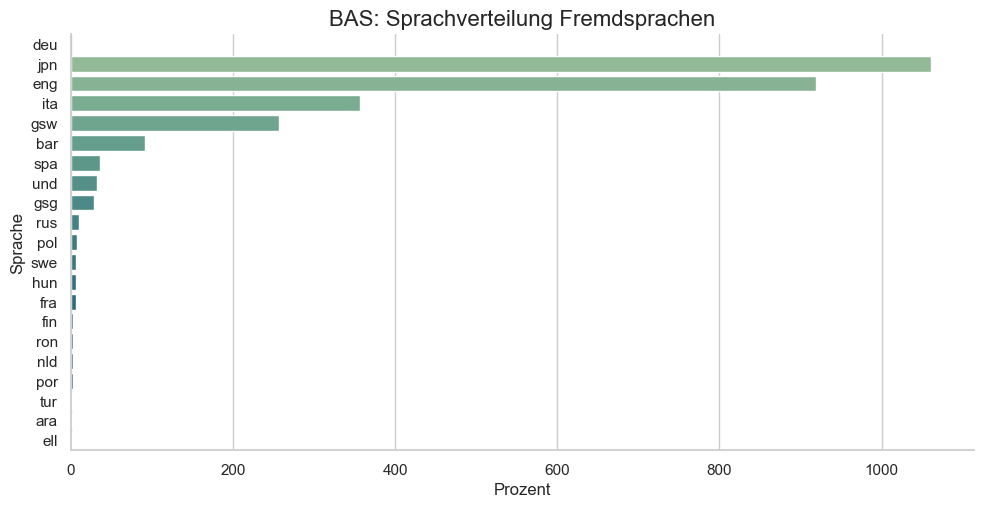

In [19]:
'Sprachverteilung ohne deu'

# Reihenfolge der Sprachen festlegen
order = data_bas['language'].value_counts().index 

# Konvertieren der Daten in kategorische Variablen
data_bas['language'] = pd.Categorical(data_bas['language'], categories=order, ordered=True)

data_bas_lang_flt = data_bas[(data_bas['language'] != 'deu')] # Filtern der Sprache 'deu'
sns.set_style('whitegrid')
sns.catplot(data_bas_lang_flt, y = 'language', kind='count', aspect = 2, hue = 'language', palette = 'crest', legend=False)

plt.title('BAS: Sprachverteilung Fremdsprachen', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Sprache', fontsize=12)
plt.show()

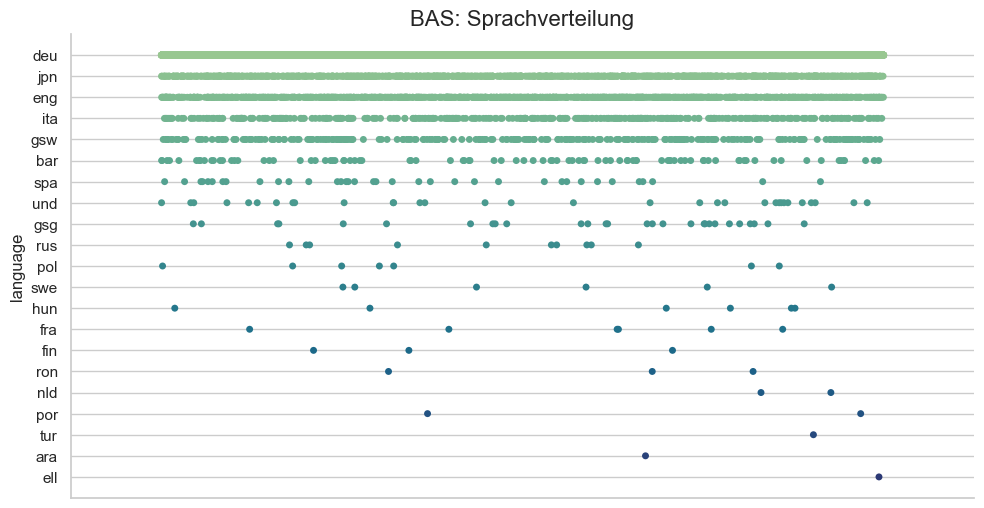

In [20]:
'Scatterplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_bas['language'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_bas['language'] = pd.Categorical(data_bas['language'], categories=order, ordered=True)


sns.catplot(data_bas, y = 'language', aspect = 2, hue = 'language', palette="crest", jitter=0.4, legend=False) # Sprachverteilung mit erhöhtem Jitter

plt.title('BAS: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.savefig('BAS_language_scatter.png', dpi=600, bbox_inches='tight')
plt.show()


### Verteilung der Publisher

[Zurück zum Anfang](#0)

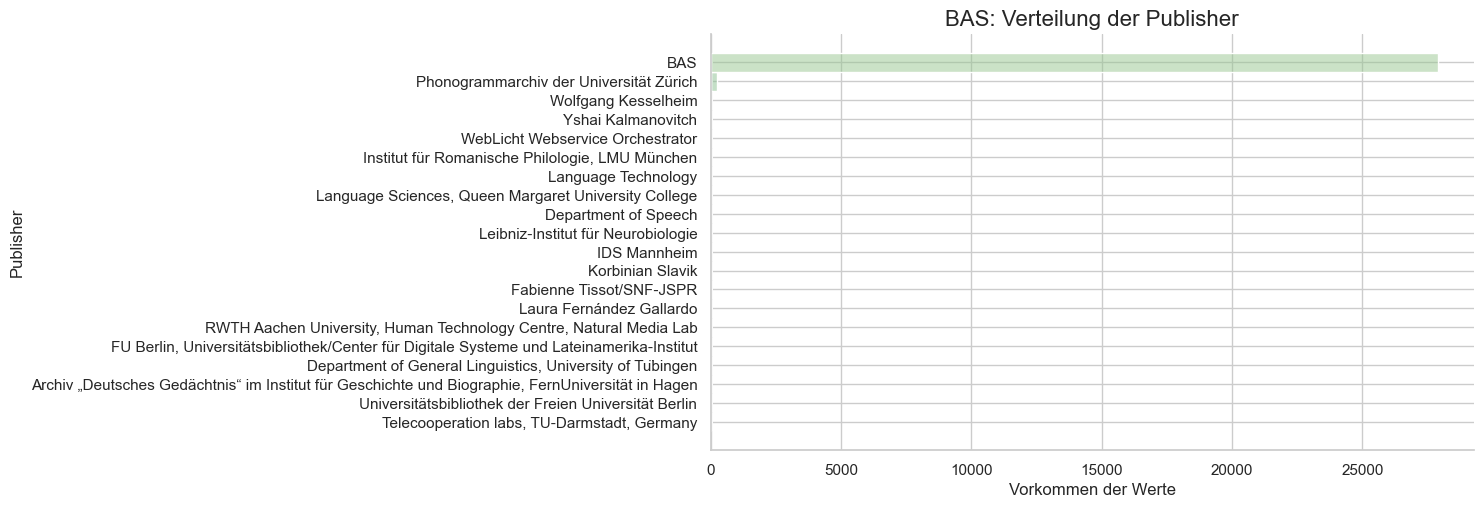

In [21]:
# Reihenfolge der Werte festlegen
order = data_bas['publisher'].value_counts().index 

# Konvertieren der Daten in kategorische Variablen
data_bas['publisher'] = pd.Categorical(data_bas['publisher'], categories=order, ordered=True)

sns.displot(data_bas, y = 'publisher', aspect = 3, hue='publisher', palette="crest", legend=False)


plt.title('BAS: Verteilung der Publisher', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()

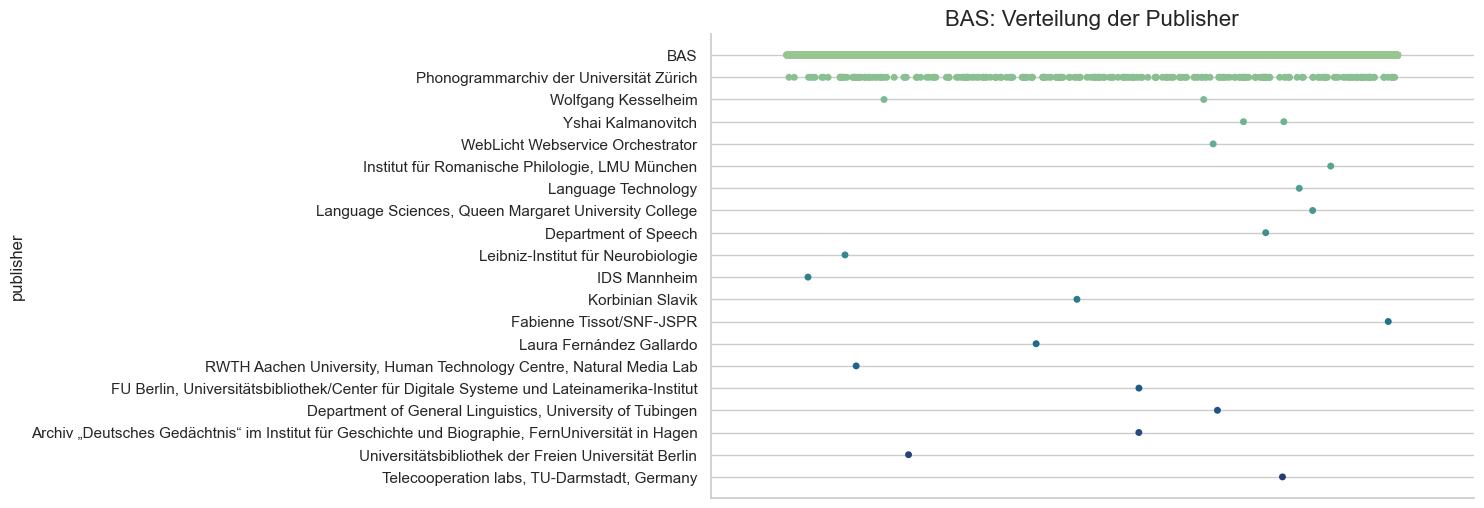

In [22]:
'Verteilung der Records nach Publisher als Scatterplot'

# Reihenfolge der Werte festlegen
order = data_bas['publisher'].value_counts().index 

# Konvertieren der Daten in kategorische Variablen
data_bas['publisher'] = pd.Categorical(data_bas['publisher'], categories=order, ordered=True)

sns.catplot(data_bas, y = 'publisher', hue = 'publisher', palette='crest', aspect = 3, jitter=0.4, legend=False)

plt.title('BAS: Verteilung der Publisher', fontsize=16)
plt.savefig('BAS_publisher_scatter.png', dpi=600, bbox_inches='tight')
plt.show()

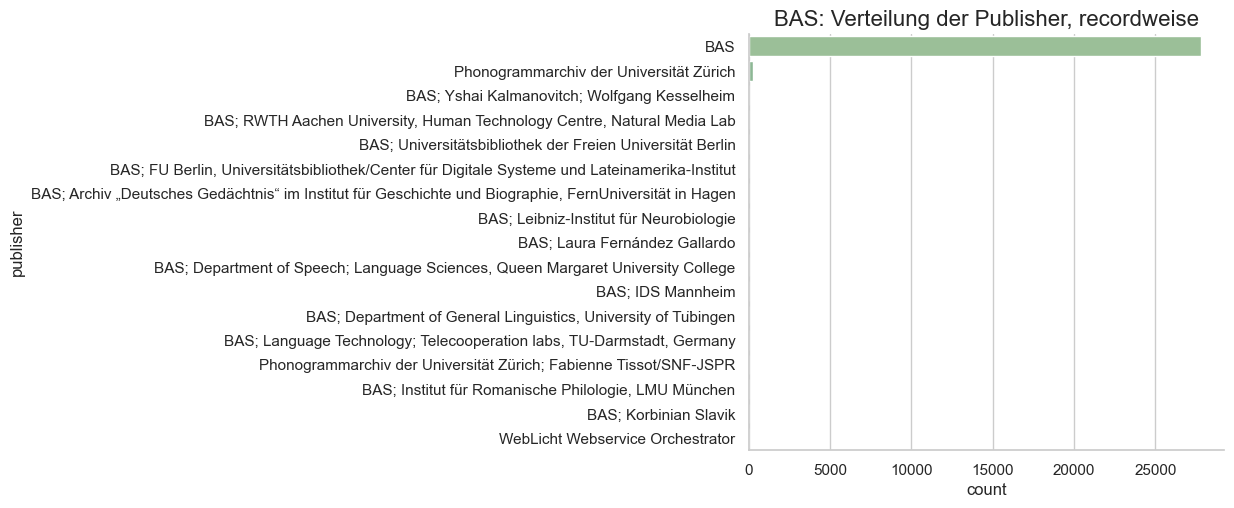

In [23]:
'Verteilung der Records nach Publisher als Scatterplot'

# Reihenfolge der Werte festlegen
order = data_bas_grouped['publisher'].value_counts().index 

# Konvertieren der Daten in kategorische Variablen
data_bas_grouped['publisher'] = pd.Categorical(data_bas_grouped['publisher'], categories=order, ordered=True)

sns.catplot(data_bas_grouped, y = 'publisher', kind='count', hue = 'publisher', palette='crest', aspect = 2.5, legend=False)

plt.title('BAS: Verteilung der Publisher, recordweise', fontsize=16)
plt.savefig('BAS_publisher_record_cat.png', dpi=600, bbox_inches='tight')
plt.show()

### Verteilung des Ressourchentyps

[Zurück zum Anfang](#0)

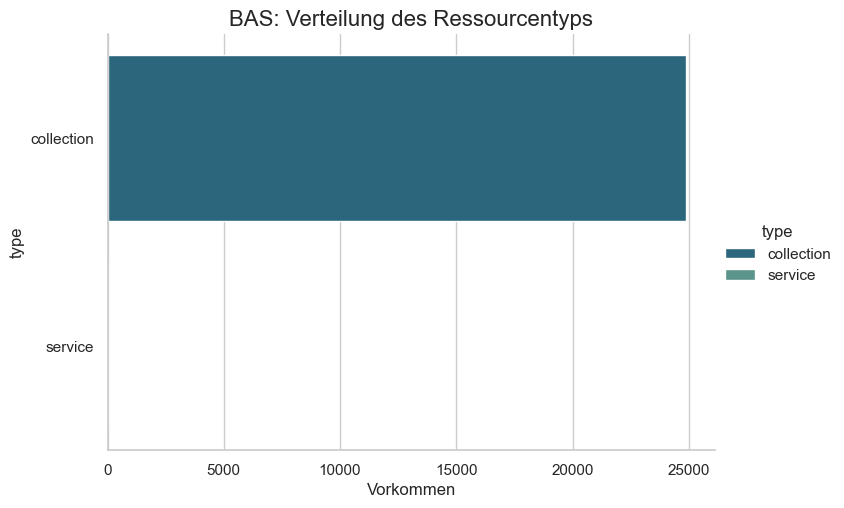

In [24]:

'Verteilung des Ressourcentyps wie vom BAS angegeben'

order = data_bas['type'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bas['type'] = pd.Categorical(data_bas['type'], categories=order, ordered=True)

sns.catplot(data_bas, y = 'type', kind = 'count', aspect = 1.5, hue = 'type', palette='crest_r')

plt.title('BAS: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.savefig('BAS_type_hist.png', dpi=600, bbox_inches='tight')
plt.show()



### Verteilung des Ressourcenformats

[Zurück zum Anfang](#0)



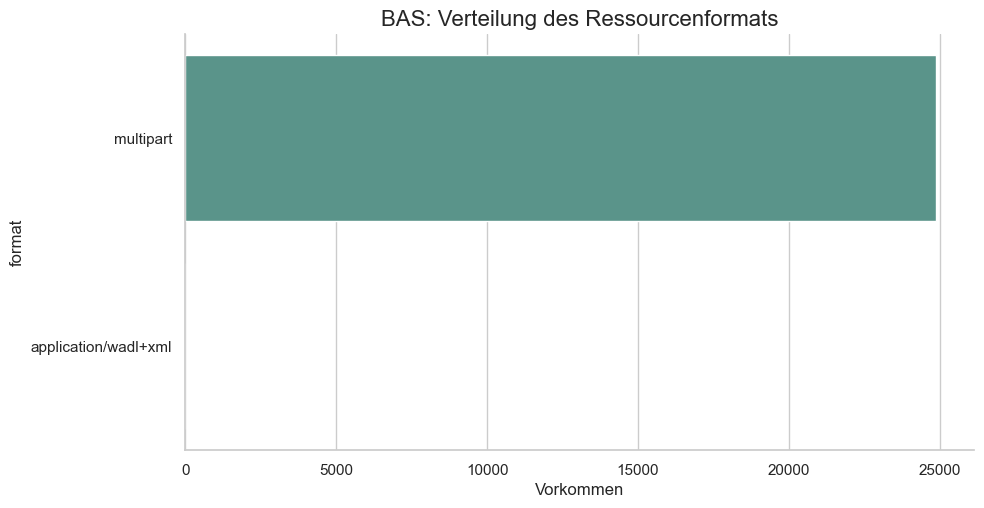

In [25]:
order = data_bas['format'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bas['format'] = pd.Categorical(data_bas['format'], categories=order, ordered=True)

sns.catplot(data_bas, y = 'format', kind = 'count', aspect = 2, hue = 'format', palette='crest', legend=False)

plt.title('BAS: Verteilung des Ressourcenformats', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('format', fontsize=12)
plt.savefig('BAS_format_hist.png', dpi=600, bbox_inches='tight')
plt.show()

<a id="3"></a>
## 3. Word Clouds
[Zurück zum Anfang](#0)


### Häufige Titelbegriffe

[Zurück zum Anfang](#0)

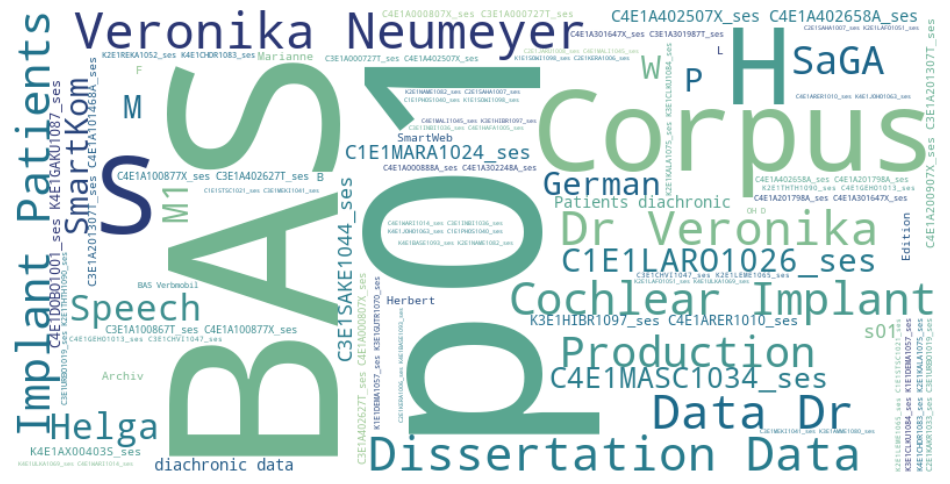

{'p01': 1.0, 'BAS': 0.9230769230769231, 'Corpus': 0.4230769230769231, 'H': 0.38461538461538464, 'S': 0.38461538461538464, 'Veronika Neumeyer': 0.34615384615384615, 'Dissertation Data': 0.3076923076923077, 'Data Dr': 0.3076923076923077, 'Dr Veronika': 0.3076923076923077, 'Cochlear Implant': 0.3076923076923077, 'Implant Patients': 0.3076923076923077, 'Production': 0.2692307692307692, 'SaGA': 0.23076923076923078, 'Speech': 0.19230769230769232, 'Helga': 0.19230769230769232, 'M1': 0.19230769230769232, 'SmartKom': 0.15384615384615385, 'W': 0.15384615384615385, 'M': 0.15384615384615385, 'P': 0.15384615384615385, 'German': 0.15384615384615385, 'C1E1LARO1026_ses': 0.15384615384615385, 'C4E1MASC1034_ses': 0.15384615384615385, 'C1E1MARA1024_ses': 0.15384615384615385, 'C3E1SAKE1044_ses': 0.15384615384615385, 's01': 0.15384615384615385, 'C4E1A402507X_ses C4E1A402658A_ses': 0.15384615384615385, 'Patients diachronic': 0.15384615384615385, 'diachronic data': 0.15384615384615385, 'K3E1HIBR1097_ses C4E1

In [26]:
# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_bas["title"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='crest', max_words=80).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.savefig('BAS_title_wordcloud.png', dpi=600, bbox_inches='tight')
plt.show()
print(wordcloud.words_)




### Beschreibung der Resource

[Zurück zum Anfang](#0)

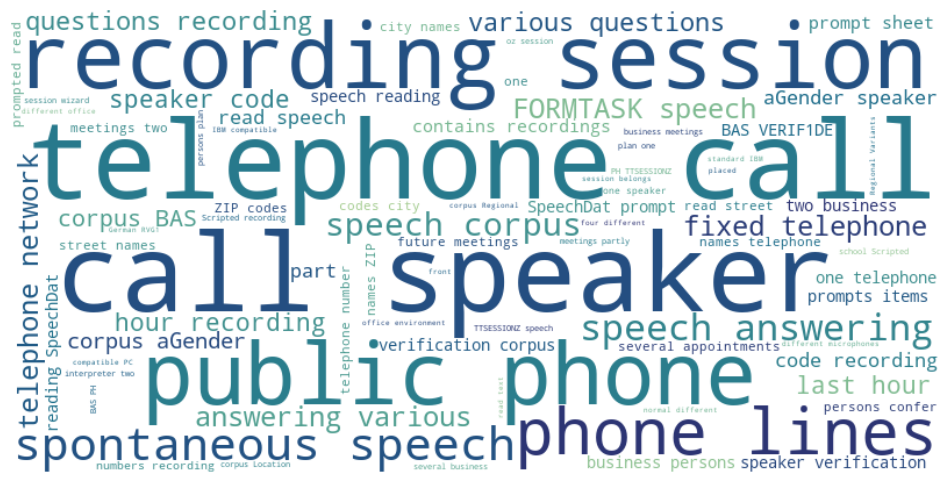

{'telephone call': 1.0, 'call speaker': 1.0, 'recording session': 0.7151822168456071, 'public phone': 0.6700438530167852, 'phone lines': 0.6699682443671556, 'spontaneous speech': 0.6394223499168304, 'speech answering': 0.6252079237864812, 'speech corpus': 0.4589445032511719, 'FORMTASK speech': 0.3301073642824739, 'fixed telephone': 0.3301073642824739, 'telephone network': 0.3301073642824739, 'answering various': 0.3301073642824739, 'various questions': 0.3301073642824739, 'questions recording': 0.3299561469832149, 'speaker code': 0.2991834265840012, 'last hour': 0.2951761681536368, 'hour recording': 0.2949493422047482, 'corpus BAS': 0.27461061545440796, 'corpus aGender': 0.2733252684107062, 'aGender speaker': 0.27317405111144716, 'code recording': 0.27309844246181764, 'part': 0.25729623468924845, 'read speech': 0.2520036292151822, 'contains recordings': 0.22780886133373657, 'prompt sheet': 0.2270527748374414, 'SpeechDat prompt': 0.22697716618781189, 'two business': 0.22697716618781189,

In [27]:
# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_bas["description"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='crest', max_words=80).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.savefig('BAS_description_wordcloud.png', dpi=600, bbox_inches='tight')
plt.show()
print(wordcloud.words_)


### Thema der Resource

[Zurück zum Anfang](#0)

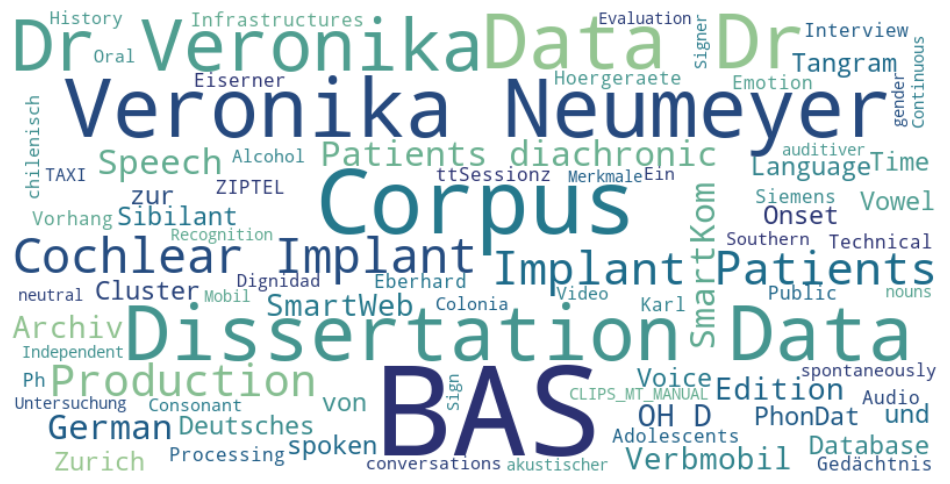

{'BAS': 1.0, 'Corpus': 0.4230769230769231, 'Veronika Neumeyer': 0.34615384615384615, 'Dissertation Data': 0.3076923076923077, 'Data Dr': 0.3076923076923077, 'Dr Veronika': 0.3076923076923077, 'Cochlear Implant': 0.3076923076923077, 'Implant Patients': 0.3076923076923077, 'Production': 0.2692307692307692, 'SmartKom': 0.15384615384615385, 'Speech': 0.15384615384615385, 'German': 0.15384615384615385, 'Patients diachronic': 0.15384615384615385, 'Archiv': 0.11538461538461539, 'Verbmobil': 0.11538461538461539, 'SmartWeb': 0.11538461538461539, 'Edition': 0.11538461538461539, 'OH D': 0.11538461538461539, 'Voice': 0.07692307692307693, 'Onset': 0.07692307692307693, 'Time': 0.07692307692307693, 'Deutsches': 0.07692307692307693, 'Cluster': 0.07692307692307693, 'spoken': 0.07692307692307693, 'Language': 0.07692307692307693, 'Database': 0.07692307692307693, 'und': 0.07692307692307693, 'zur': 0.07692307692307693, 'von': 0.07692307692307693, 'Vowel': 0.07692307692307693, 'Sibilant': 0.0769230769230769

In [28]:
'Wenig vergebenes Metadatenfeld'

# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_bas["subject"].str.cat(sep=' ')


# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='crest', max_words=80).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

print(wordcloud.words_)